In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problem Statement

Imagine you have a dataset where you have predicted loan Eligibility using any
4 different classification algorithms. Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and built-in
docker and use some library to display that in frontend
Dataset This is the Dataset You can use this dataset for this question.

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Loan Approval/Training Dataset.csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_data.size

7982

In [6]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
train_data1 = pd.DataFrame(train_data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']])
train_data1       

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [9]:
train_data1

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [10]:
train_data1['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>

In [11]:
train_data1.isna().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [12]:
train_data1['Dependents']=train_data1['Dependents'].fillna(train_data1['Dependents'].mode()[0])
train_data1['Gender']=train_data1['Gender'].fillna(train_data1['Gender'].mode()[0])
train_data1['Married']=train_data1['Married'].fillna(train_data1['Married'].mode()[0])
train_data1['Self_Employed']=train_data1['Self_Employed'].fillna(train_data1['Self_Employed'].mode()[0])

In [13]:
train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].mean())
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean())
train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())

In [14]:
train_data1.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

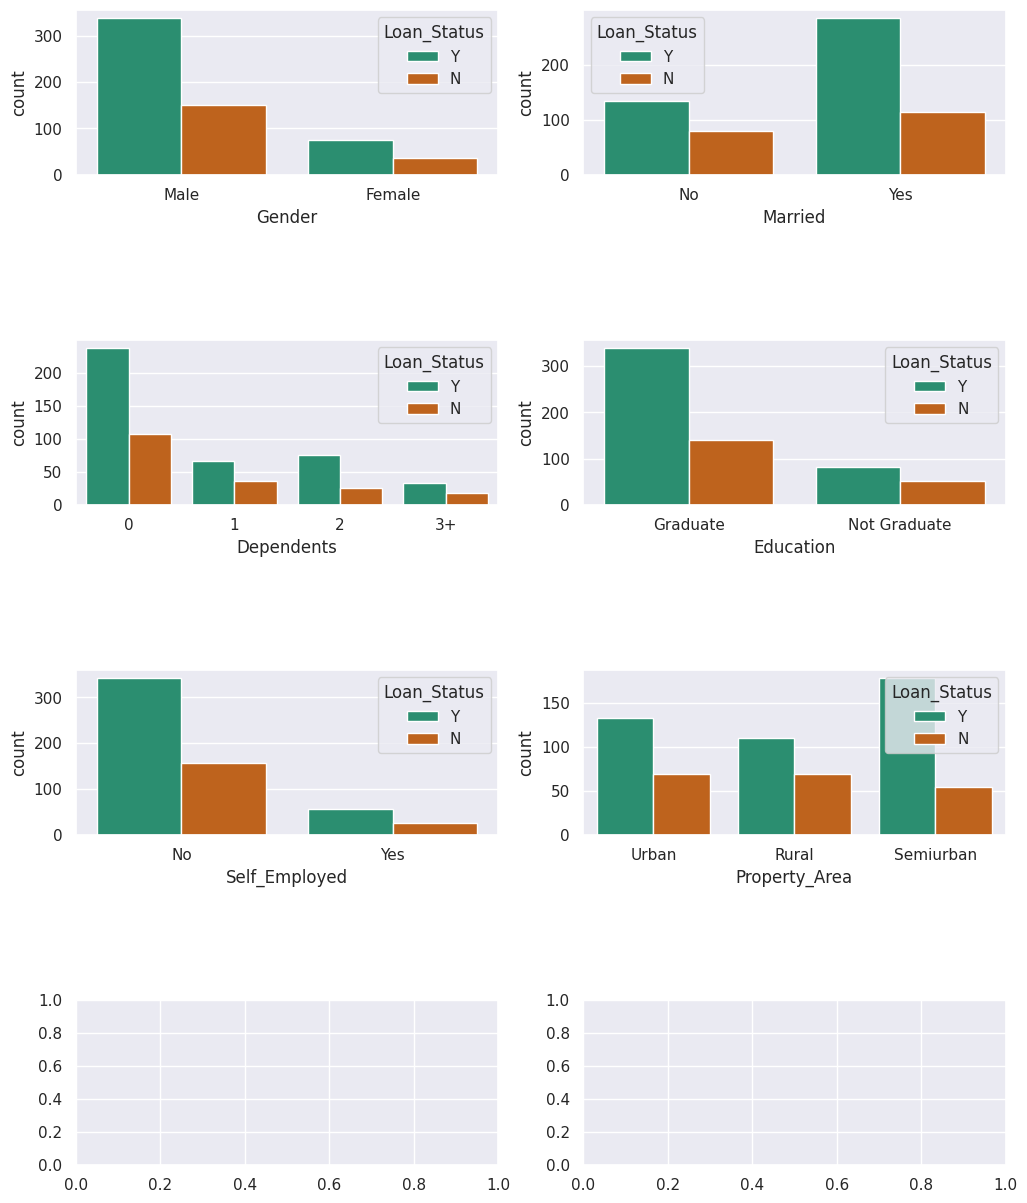

In [15]:
### Data Visualization libraries
sns.set_theme(style="darkgrid")
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(train_data1):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_data,hue='Loan_Status',ax=axes[row,col],palette="Dark2")

plt.subplots_adjust(hspace=1)

# Analyzing the numerical columns

In [16]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print("Numerical Columns in training dataset based on datatypes {}".format(numerical_columns))

Numerical Columns in training dataset based on datatypes ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


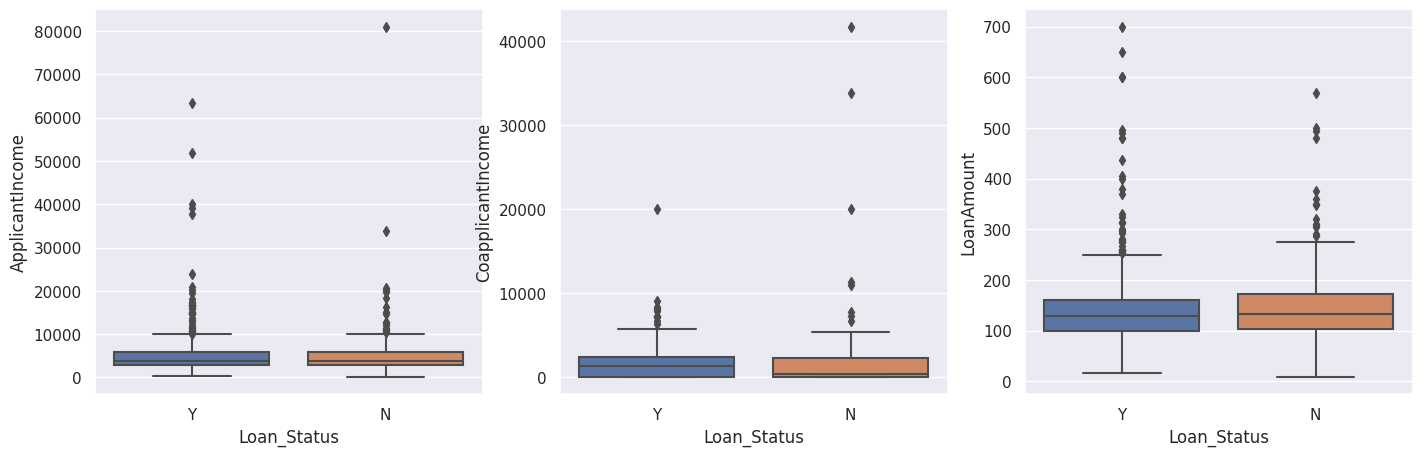

In [18]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_data,x='Loan_Status',ax=axes[idx])

print(train_data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

# Co-relation between the dataset

<ipython-input-19-f1d709434f7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap='cubehelix_r')


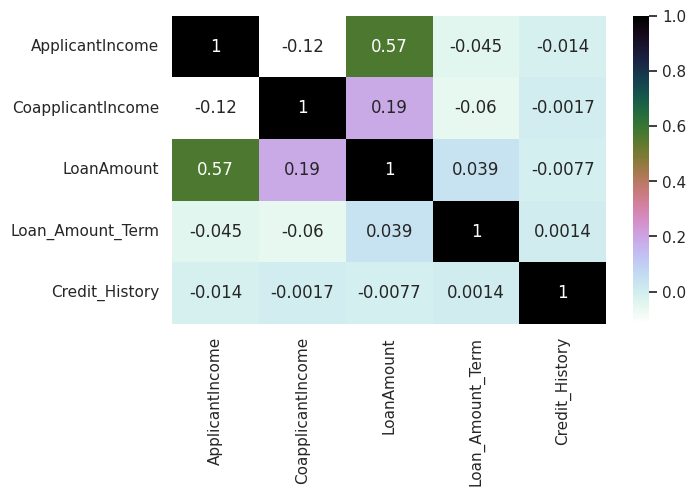

In [19]:
plt.figure(figsize=(7,4)) 
sns.heatmap(train_data.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

# Preprocessing of the dataset

In [20]:
dummy_Gender = pd.get_dummies(train_data['Gender'], prefix = 'Gender')
dummy_Married = pd.get_dummies(train_data['Married'], prefix = "Married")
dummy_Education = pd.get_dummies(train_data['Education'], prefix = "Education")
dummy_Self_Employed = pd.get_dummies(train_data['Self_Employed'], prefix = "Selfemployed")
dummy_Property_Area = pd.get_dummies(train_data['Property_Area'], prefix = "Property")
dummy_Dependents = pd.get_dummies(train_data['Dependents'], prefix = "Dependents")
dummy_Loan_status = pd.get_dummies(train_data['Loan_Status'], prefix = "Approve")

In [21]:
frames = [train_data,dummy_Gender,dummy_Married,dummy_Education,dummy_Self_Employed,dummy_Property_Area,dummy_Dependents,dummy_Loan_status]

In [22]:
df_train = pd.concat(frames,axis = 1)
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_N,Approve_Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,0,0,0,1,1,0,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,0,1,0,0,0,1,0,0,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,1,0,0,1,1,0,0,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,0,0,0,1,1,0,0,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,0,0,0,1,1,0,0,0,0,1


In [23]:
df_train.shape

(614, 30)

In [24]:
df_train = df_train.drop(columns = [ 'Loan_ID','Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area','Loan_Status','Approve_N'],axis = 1)

In [25]:
df_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Selfemployed_No', 'Selfemployed_Yes',
       'Property_Rural', 'Property_Semiurban', 'Property_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Approve_Y'],
      dtype='object')

In [26]:
df_train.shape

(614, 21)

# Test DataSet

In [27]:
test_df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Loan Approval/Test Dataset.csv')
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [29]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: >

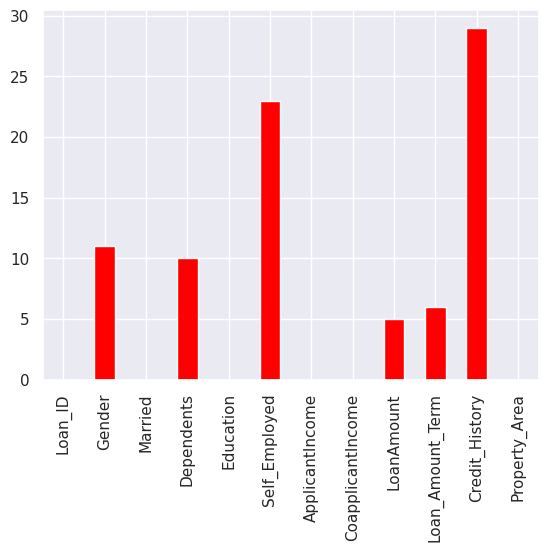

In [30]:
test_df.isnull().sum().plot(kind='bar',color = 'red')

In [31]:
test_df['Gender']=test_df['Gender'].fillna(test_df['Gender'].mode()[0])
test_df['Dependents']=test_df['Dependents'].fillna(test_df['Dependents'].mode()[0])
test_df['Self_Employed']=test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0])

In [32]:
test_df['LoanAmount']=test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean())
test_df['Loan_Amount_Term']=test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mean())
test_df['Credit_History']=test_df['Credit_History'].fillna(test_df['Credit_History'].mean())

In [33]:
test_df = test_df.drop(columns=['Loan_ID'])

<ipython-input-34-7a26fdec8989>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_df.corr(),annot=True,cmap='cubehelix_r')


<Axes: >

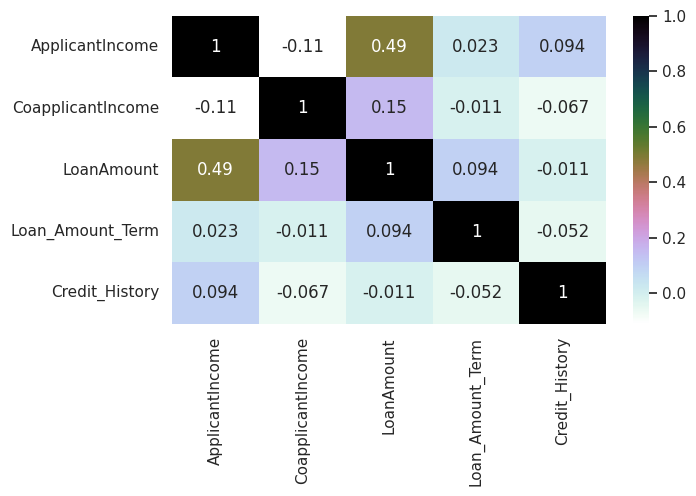

In [34]:
plt.figure(figsize=(7,4)) 
sns.heatmap(test_df.corr(),annot=True,cmap='cubehelix_r')

In [35]:
dummy_Gender = pd.get_dummies(test_df['Gender'], prefix = 'Gender')
dummy_Married = pd.get_dummies(test_df['Married'], prefix = "Married")
dummy_Education = pd.get_dummies(test_df['Education'], prefix = "Education")
dummy_Self_Employed = pd.get_dummies(test_df['Self_Employed'], prefix = "Selfemployed")
dummy_Property_Area = pd.get_dummies(test_df['Property_Area'], prefix = "Property")
dummy_Dependents = pd.get_dummies(test_df['Dependents'], prefix = "Dependents")

In [36]:
frames = [test_df,dummy_Gender,dummy_Married,dummy_Education,dummy_Self_Employed,dummy_Property_Area,dummy_Dependents]
df_test = pd.concat(frames, axis = 1)

df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Education_Not Graduate,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,...,0,1,0,0,0,1,1,0,0,0
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,...,0,1,0,0,0,1,0,1,0,0
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,...,0,1,0,0,0,1,0,0,1,0
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,...,0,1,0,0,0,1,0,0,1,0
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,...,1,1,0,0,0,1,1,0,0,0


In [37]:
df_test = df_test.drop(columns = [ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area'])
df_test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Selfemployed_No', 'Selfemployed_Yes',
       'Property_Rural', 'Property_Semiurban', 'Property_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')

# Final Dataset

In [38]:
Final_df=pd.concat([df_train,df_test],axis=0)
Final_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,1,...,1,0,1,0,0,0,1,0,0,0.0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,1,0,0,0,1.0
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1.0
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0


<Axes: >

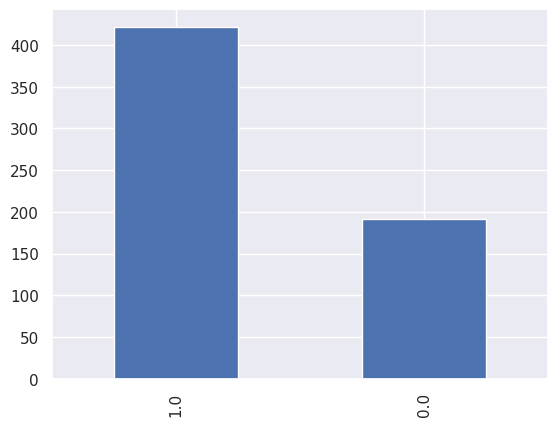

In [39]:
Final_df['Approve_Y'].value_counts().plot(kind='bar')

In [40]:
Train_df=Final_df.iloc[:614,:]
Test_df=Final_df.iloc[614:,:]

In [41]:
Train_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,...,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,1,...,1,0,1,0,0,0,1,0,0,0.0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,1,0,0,0,1.0
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,1.0
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,1,0,0,0,1,1,0,0,0,1.0


In [42]:
Train_df.shape

(614, 21)

In [43]:
X_train=Train_df.drop(['Approve_Y'],axis=1)
y_train=Train_df['Approve_Y']

In [44]:
X_train.shape

(614, 20)

In [45]:
y_train.shape


(614,)

In [46]:
from sklearn.linear_model import LogisticRegression ,Lasso
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier

In [47]:
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state = rs))
clrs.append(ExtraTreesClassifier(random_state = rs))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","Logistic Regression","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier']})

In [48]:
print(cv_df)

   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.773560        0.036649  RandomForestClassifier
1              0.775226        0.034016     Logistic Regression
2              0.788278        0.035517      AdaBoostClassifier
3              0.798082        0.023242       Gradient Boosting
4              0.744318        0.028975    ExtraTreesClassifier


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=4)

In [50]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsGBC.fit(X_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_,gsGBC.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


(0.7087519830777367,
 {'learning_rate': 0.1,
  'loss': 'deviance',
  'max_depth': 8,
  'max_features': 0.1,
  'min_samples_leaf': 100,
  'n_estimators': 100})

In [51]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [2, 3],
              "min_samples_split": [7, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}



rf_param_grid = { 
    'max_features':['auto'], 'oob_score':[True], 'random_state':[1],
    "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5], "min_samples_split" : [ 4, 10 ], "n_estimators": [ 100, 400, 700]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_, gsRFC.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


(0.8147474881015335,
 {'criterion': 'entropy',
  'max_features': 'auto',
  'min_samples_leaf': 5,
  'min_samples_split': 4,
  'n_estimators': 100,
  'oob_score': True,
  'random_state': 1})

In [52]:
# Logistic regression Parameters tunning 
LRClr = LogisticRegression()


## Search grid for optimal parameters
LRClr_param_grid = {'penalty':['l2','l1'],'C':[1,10,100],'random_state':[rs]}

gsLRClr=GridSearchCV(LRClr,param_grid = LRClr_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 0)



gsLRClr.fit(X_train,y_train)

LRClr_best = gsLRClr.best_estimator_

# Best score
gsLRClr.best_score_, gsLRClr.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

(0.7943548387096774, {'C': 100, 'penalty': 'l2', 'random_state': 15})

# After Hyper parameter tunning...We get

1.Gradient boosting tunning-0.7128172924378635

2.RFC Parameters tunning-0.8127313590692755

3.Logistic regression Parameters tunning-0.7943548387096774